In [135]:
import math
import numpy
import matplotlib.pyplot as plt

In [178]:
M_SUN = 1.989e30
M_EARTH = 5.972e24
G = 6.6743e-11

RD = 147.11e9 # m
co = []
T = 365.256 # total time to revole


- Assumption earth is moving tanget to sun at start
- Earth need to stay in orbit, so initial calculation will based of that
- Time unit is day

In [209]:
def gravity(rd):
  return G * M_SUN * M_EARTH / rd ** 2

def get_next_point(x = RD, y = 0, v_xy = 0, co = [], anglelist = [], gforcelist = [], velocity = [], accel = [], velocitylist = []):
    rd = math.sqrt(math.pow(x, 2) + math.pow(y, 2))
    g_force = gravity(rd)
    acceleration = g_force / M_EARTH;
#     print("*" * 100)
#     print("g : ", g_force)
#     print("x : ", x)
#     print("y : ", y)
#     print("v : ", v_xy)
#     print("r : ", rd)
    gforcelist.append(g_force)
    if not v_xy:
        angle = (2 * math.pi / T)
        anglelist.append(angle)
        v = angle * rd
        velocity.append(v)
        v_earth_x = v * math.cos(math.pi / 2 + sum(anglelist)) + acceleration * math.cos(math.pi + sum(anglelist))
        v_earth_y = v * math.sin(math.pi / 2 + sum(anglelist)) + acceleration * math.sin(math.pi + sum(anglelist))
        velocitylist.append([v_earth_x, v_earth_y])
        x_earth = x + v_earth_x
        y_earth = y + v_earth_y
        accel.append([acceleration * math.cos(math.pi + sum(anglelist)), acceleration * math.sin(math.pi + sum(anglelist))])
#         print("angle : ", angle)
        return  [x_earth, y_earth, (v_earth_x, v_earth_y)]
    else :
        v = math.sqrt(math.pow(v_xy[0], 2) + math.pow(v_xy[1], 2))
        angle = v /  rd;
        velocity.append(v)
#         print("angle : ", angle)
        anglelist.append(angle)
        v_earth_x = v * math.cos(math.pi / 2 + sum(anglelist)) - acceleration * math.cos(math.pi + sum(anglelist))
        v_earth_y = v * math.sin(math.pi / 2 + sum(anglelist)) - acceleration * math.sin(math.pi + sum(anglelist))
        velocitylist.append([v_earth_x, v_earth_y])
        x_earth = x + v_earth_x
        y_earth = y + v_earth_y
        accel.append([acceleration * math.cos(math.pi + sum(anglelist)), acceleration * math.sin(math.pi + sum(anglelist))])
#         print("acceleration : ", acceleration)
#         print("Velocity X : ", v * math.cos(math.pi / 2 + sum(anglelist)))
#         print("Velocity Y : ", v * math.sin(math.pi / 2 + sum(anglelist)))
#         print("Gravity X : ", acceleration * math.cos(math.pi + sum(anglelist)))
#         print("Gravity Y : ", acceleration * math.sin(math.pi + sum(anglelist)))
        
#         print("x_cal : ", x_earth)
#         print("y_cal : ", y_earth)
        return [x_earth, y_earth, (v_earth_x, v_earth_y)]
    
    
    
def trace():
    co = []
    anglelist = []
    gforcelist = []
    velocity = []
    accel = []
    velocitylist = []
    pt = get_next_point(RD, 0, 0, co, anglelist, gforcelist, velocity, accel, velocitylist)
    for i in range(400):
        pt = get_next_point(pt[0], pt[1], pt[2], co, anglelist, gforcelist, velocity, accel, velocitylist)
#         print("pt : ", pt)
        co.append(pt)
    co = numpy.array(co)
    rd = RD
    plt.plot(co[:, 1], co[:, 0])
    plt.xlim(-rd, rd)
    plt.ylim(-rd, rd)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("co ordinates")
    plt.show()
    
#     plt.plot(numpy.arange(len(co[:, 1])), co[:, 0])
#     plt.title("co ordinates X 0")
#     plt.show()
    
#     plt.plot(numpy.arange(len(co[:, 0])), co[:, 1])
#     plt.title("co ordinates  X 1")
#     plt.show()
    
#     print(anglelist)
    plt.title("Angle")
    plt.plot(numpy.arange(len(anglelist)), anglelist)
    plt.show()
    
    plt.title("Angle theta1")
    plt.plot(numpy.arange(len(anglelist)), numpy.cumsum(anglelist))
    plt.show()
    
    plt.title("Angle theta1 diff")
    plt.plot(numpy.arange(len(numpy.diff(anglelist))), numpy.diff(anglelist))
    plt.show()
    
    
    plt.title("Gavity")
    plt.plot(numpy.arange(len(gforcelist)), gforcelist)
    plt.show()
    
    accel = numpy.array(accel)
    
    plt.plot(numpy.arange(len(accel[:, 1])), accel[:, 0])
    plt.title("accel X 0")
    plt.show()
    
    plt.plot(numpy.arange(len(accel[:, 0])), accel[:, 1])
    plt.title("accel  X 1")
    plt.show()
    
    
    plt.title("Velocity")
    plt.plot(numpy.arange(len(velocity)), velocity)
    plt.show()
    
    
    velo = numpy.array(velocitylist)
    plt.plot(numpy.arange(len(velo[:, 1])), velo[:, 0])
    plt.title("Velocity X 0")
    plt.show()
    
    plt.plot(numpy.arange(len(velo[:, 0])), velo[:, 1])
    plt.title("Velocity  X 1")
    plt.show()

#     print(co[:])
#     print("velocity  : ", velocity)
    

<ipython-input-209-0f0ccb68e705>:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  co = numpy.array(co)


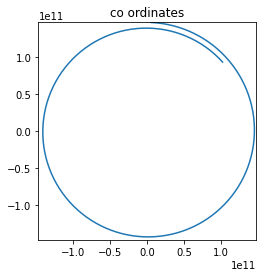

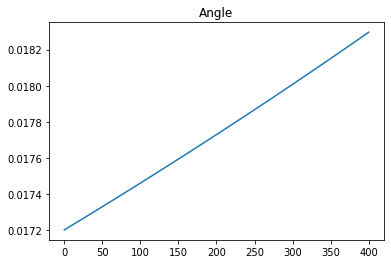

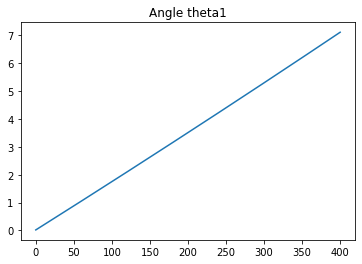

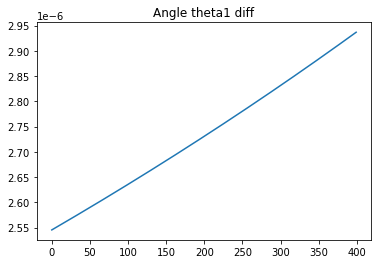

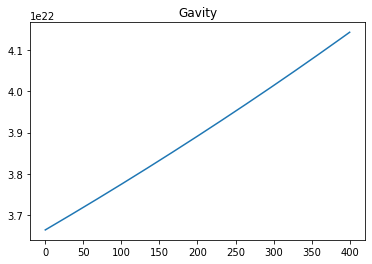

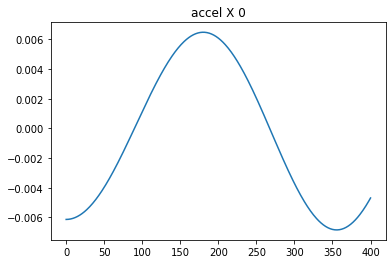

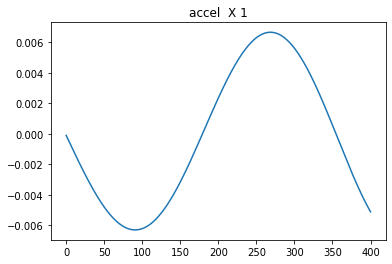

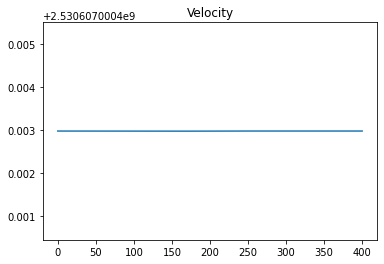

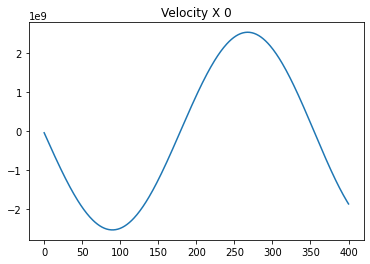

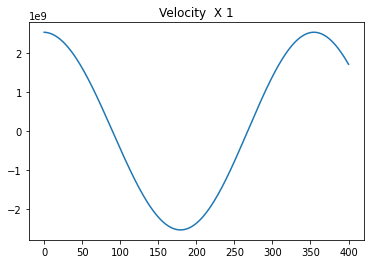

In [210]:
trace()

In [128]:
math.atan(1) * 4


3.141592653589793

In [72]:
math.tan(math.radians(45))

0.9999999999999999